In [1]:
import numpy as np
from ROOT import TCanvas, TGraphErrors, TF1, TGraph,TLatex
from ROOT import gROOT
from array import array

Welcome to JupyROOT 6.16/00


In [2]:
file_kv = open("Na.txt", "r")
x = []
y = []
sx = []
sy=[]
for line in file_kv:
    string = line.split()
    x.append(float(string[0]))
    sx.append(0)
    y.append(float(string[1]))
    sx.append(0)
    sy.append(0)
ndata = len(x)
t=[511,834.85,1172.45,1333.51,81.00,356.01,383.86,661.66]
e=[682.3,853.3,1489.3,1684.6,66.4,416.0,491,872.1]
se=[30.3,61.9,39.8,40.2,4.2,27.77,22.3,25.25]
st=[0,0,0,0,0,0,0,0,0,0]
ndata = len(t)

In [3]:
t  =  array( 'f', t)
e  =  array( 'f', e)
st= array('f',st)
se=array('f',se)

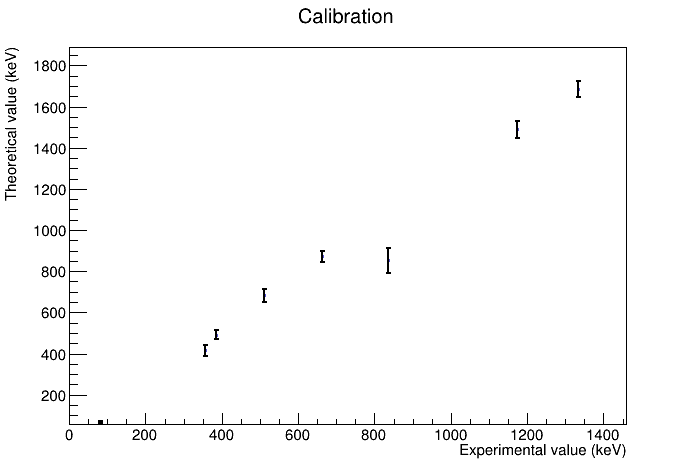

In [4]:
c1 = TCanvas( 'c1', '..', 200, 10, 700, 500 )
             
mygraph = TGraphErrors(ndata,t,e,st,se)
mygraph.Draw("AP")
mygraph.SetTitle("Calibration")
mygraph.SetLineColor( 1 )
mygraph.SetLineWidth( 2 )
mygraph.SetMarkerColor( 9)
mygraph.SetMarkerStyle( 7 )

mygraph.GetXaxis().SetTitle( 'Experimental value (keV)' )
mygraph.GetYaxis().SetTitle( 'Theoretical value (keV)')
c1.Draw()


****************************************
Minimizer is Linear
Chi2                      =      18.5559
NDf                       =            6
p0                        =     -38.7526   +/-   4.83683     
p1                        =      1.31413   +/-   0.0194853   


Warning in <Fit>: Fit data is empty 


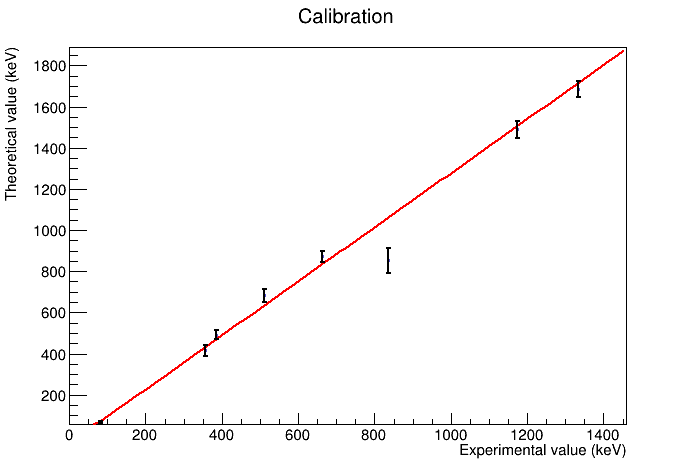

In [5]:
l1=TF1('l1','gaus')
#l2=TF1('l2','gaus')
l2=TF1('l2','pol1')
mygraph.Fit(l1,'','',1400,1600)
mygraph.Fit(l2,'','')

c1.Draw()